### **Random Forest**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("penguins.csv")
df = df.dropna()
df = df[df["sex"] != "."]
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


### **Train Test Split**

In [11]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first= True)

In [14]:
X[:2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False


In [15]:
y = df["species"]

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

### **Random Forest Model**

In [ ]:
# Kısaca birsürü desicion treenin bir araya gelerek oluştuduğumuz model
# Diğerinde bir tane ağaca göre yaptık işlemi bunda:
# 333 satırı örneğin 100 tane farklı ağaçta sonuçta oluşanı çıkarıyor

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators=9, max_features="sqrt", random_state=9)
# n_estimators : Bu arkadaşın içindeki ağaç sayısı 9 ağaç kur diyoruz defaultu = 100

# max_features : Bunun defaultu auto ama o kaldırılacak sqrt default olarak kullanılabilir 

# random_state : Klasik random_state da işte

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=9)

In [23]:
pengu_pred = model.predict(X_test)

### **Değerlerndirme Metrikleri**

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

In [ ]:
confusion_matrix(pengu_pred, y_test)
# Bu aşşağıdaki ile bir aşşağıdaki balonun altı aynı içleri sadece daha iyi görmek için yapıyoruz onu

array([[44,  1,  1],
       [ 1, 22,  0],
       [ 1,  0, 30]], dtype=int64)

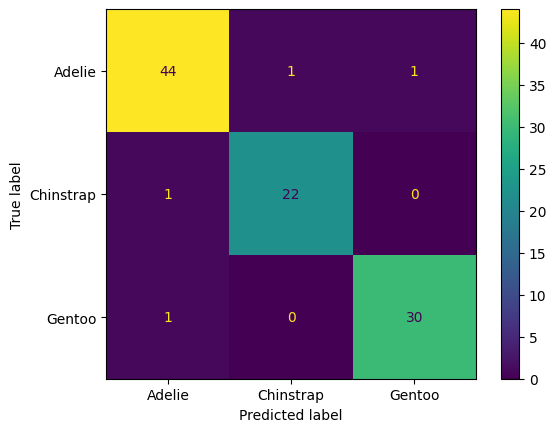

In [27]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [30]:
print(classification_report(pengu_pred, y_test))

              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96        46
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       0.97      0.97      0.97        31

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [31]:
model.feature_importances_

array([0.40410856, 0.03960461, 0.14964551, 0.20052233, 0.16789954,
       0.0315447 , 0.00667476])

### **İdeal Ağaç Sayısı**

In [34]:
hata = []

for n in range(1, 99):
    model = RandomForestClassifier(n_estimators= n, max_features="sqrt", random_state=9)

    model.fit(X_train, y_train)
    deneme_pred = model.predict(X_test)

    hata.append(1 - accuracy_score(y_test, deneme_pred))

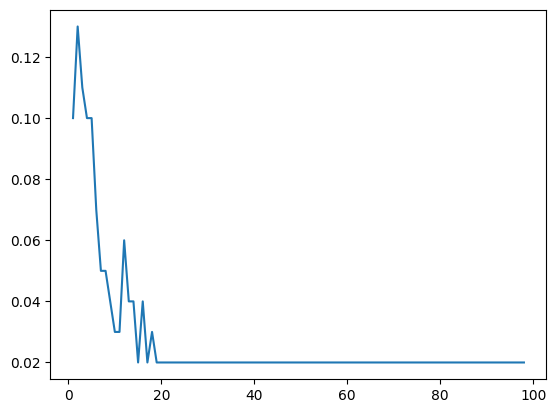

In [37]:
plt.plot(range(1, 99), hata, label = "Hata Oranı")

In [ ]:
# Biz bu verimizde ağaç sayımızı 20 dediğimizde en iyi ağaç sayısı ile en iyi modelimizi oluşturmuş oluyoruz